In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler


In [100]:
df = pd.read_excel('data/Данные_для_курсовои_Классическое_МО.xlsx')
# Удаляем нумерацию что бы она нам не мешалась
df.drop(['Unnamed: 0'], inplace = True, axis = 1)
# Проверка на наличие пропущенных значений
missing_df = pd.DataFrame({
    "Количество пропусков": df.isnull().sum(),
    "Доля пропусков (%)": (df.isnull().mean() * 100).round(2)
})

missing_df = missing_df[missing_df["Количество пропусков"] > 0]

print("Статистика пропусков:")
missing_df

Статистика пропусков:


,Количество пропусков,Доля пропусков (%)
MaxPartialCharge,3,0.3
MinPartialCharge,3,0.3
MaxAbsPartialCharge,3,0.3
MinAbsPartialCharge,3,0.3
BCUT2D_MWHI,3,0.3
BCUT2D_MWLOW,3,0.3
BCUT2D_CHGHI,3,0.3
BCUT2D_CHGLO,3,0.3
BCUT2D_LOGPHI,3,0.3
BCUT2D_LOGPLOW,3,0.3


In [101]:
df.fillna(0, inplace=True)
df

,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,384.652,...,0,0,0,0,0,0,0,0,3,0
1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,388.684,...,0,0,0,0,0,0,0,0,3,0
2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,446.808,...,0,0,0,0,0,0,0,0,3,0
3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,398.679,...,0,0,0,0,0,0,0,0,4,0
4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,466.713,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,31.000104,34.999650,1.129017,12.934891,12.934891,0.048029,-0.476142,0.382752,49.133333,414.542,...,0,0,0,0,0,0,0,0,0,0
997,31.999934,33.999415,1.062484,13.635345,13.635345,0.030329,-0.699355,0.369425,44.542857,485.621,...,0,0,0,0,0,0,0,0,0,0
998,30.999883,33.999458,1.096761,13.991690,13.991690,0.026535,-0.650790,0.284923,41.973684,545.742,...,1,0,0,0,0,0,0,0,0,0
999,31.998959,32.999644,1.031272,13.830180,13.830180,0.146522,-1.408652,0.381559,39.000000,522.635,...,0,0,0,0,0,0,0,0,0,0


## Памятка для понимания значений и интерпретации результатов

### **1. IC₅₀ (Half Maximal Inhibitory Concentration)**  
- **Определение:** Концентрация вещества, необходимая для **подавления** биологического процесса (например, репликации вируса, активности фермента) на **50%** по сравнению с контролем.  
- **Применение:**  
  - В противовирусных исследованиях — показывает, насколько эффективно вещество блокирует вирус.  
  - Чем **меньше IC₅₀**, тем выше эффективность соединения.  

### **2. CC₅₀ (Half Maximal Cytotoxic Concentration)**  
- **Определение:** Концентрация вещества, вызывающая **гибель 50% клеток** в эксперименте (токсичность).  
- **Применение:**  
  - Отражает **цитотоксичность** вещества для здоровых клеток.  
  - Чем **выше CC₅₀**, тем безопаснее соединение.  

### **3. SI (Selectivity Index — Индекс Селективности)**  
- **Формула:**  
  $ SI = \frac{CC_{50}}{IC_{50}}   $
- **Смысл:** Показывает, насколько вещество **избирательно** действует на мишень (например, вирус), а не на клетки хозяина.  
  - **SI > 10** — считается приемлемым для потенциальных лекарств.  
  - **SI > 100** — высокая селективность, минимальная токсичность.  

### **Пример интерпретации:**  
Если у препарата:  
- **IC₅₀ = 1 μM** (хорошо подавляет вирус),  
- **CC₅₀ = 100 μM** (низкая токсичность),  
то **SI = 100** — отличный кандидат для дальнейших исследований.  

Эти параметры критически важны при скрининге новых лекарств, особенно противовирусных (например, против ВИЧ, SARS-CoV-2).

In [102]:

# Функция для подсчёта выбросов в колонке
def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers.sum()

# Считаем выбросы для каждой колонки
outliers_count = df.apply(count_outliers)

# Выбираем топ-10 колонок с наибольшим числом выбросов
top_10_outlier_columns = outliers_count.nlargest(5).index.tolist()

# Фильтруем DataFrame и применяем describe()
result = df[top_10_outlier_columns].describe()

result


,VSA_EState10,VSA_EState9,fr_Al_OH,fr_amide,fr_aniline
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,1.004678,0.564455,0.403596,0.340659,0.298701
std,2.227132,1.684081,1.040647,0.700596,0.658550
min,0.000000,-7.681287,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,15.553441,10.183618,12.000000,4.000000,4.000000


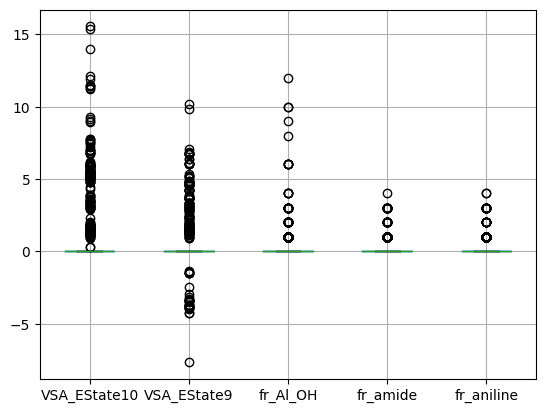

In [103]:
df[top_10_outlier_columns].boxplot()
plt.show()

### **Сводная таблица: Анализ выбросов в молекулярных дескрипторах и их влияние на разработку препарата**    

| **Дескриптор**      | **Тип данных**               | **Диапазон значений**       | **Выбросы**                     | **Опасность для результата**                                                                 | **Рекомендации**                                                                 |
|---------------------|-----------------------------|----------------------------|---------------------------------|---------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------|
| **VSA_EState10**    | Электронно-топологический   | 0.0 – 15.55                | Значения > 10 (редкие)          | **Высокая** – Могут указывать на аномальную реакционную способность или артефакты в данных.  | Проверить структуры с высокими значениями на корректность. Исключить или изучить отдельно. |
| **VSA_EState9**     | Электронно-топологический   | -7.68 – 10.18              | Отрицательные значения (< 0)    | **Средняя** – Отрицательные значения могут быть ошибкой или редкой формой молекулы.           | Уточнить, возможны ли отрицательные значения для данного класса соединений.       |
| **fr_Al_OH**       | Количество Al-OH групп      | 0 – 12                     | Значения > 1 (особенно 12)      | **Критическая** – Алюминий в лекарствах редкость. Возможна токсичность или ошибка в данных.  | Исключить соединения с Al > 1, если не ожидается в рамках исследования.          |
| **fr_amide**       | Количество амидных групп    | 0 – 4                      | Значения > 2                    | **Низкая** – Амиды распространены, но высокие значения могут указывать на пептидную природу. | Учесть при анализе растворимости и стабильности.                                 |
| **fr_aniline**     | Количество анилин-групп     | 0 – 4                      | Значения > 2                    | **Средняя** – Анилин токсичен, его производные требуют проверки на безопасность.             | Проверить связь с токсичностью (например, метгемоглобинемия).                   |



### **Вывод получений при изучении выбросов и требуют престольного внимания**                
Выбросы в **`fr_Al_OH` и `VSA_EState10`** требуют **наибольшего внимания**, так как могут существенно исказить прогноз эффективности и безопасности препарата. Рекомендуется:  
1. **Верифицировать** данные (возможны ошибки ввода).  
2. **Исключить** или **отдельно изучить** аномальные соединения.  
3. **Документировать** все решения для воспроизводимости исследования.  

*Данные собраны с помощью консультаций с ИИ. Поэтому возможны неверные выводы, но, так как речь идёт о лекарственных препаратах, хотелось охватить как можно больше факторов, которые могут повлиять на эксперимент, и как можно лучше разобраться в предметной области.

In [ ]:
# Разделение на признаки (X) и целевые переменные (y)
X = df.drop(columns=["IC50, mM", "CC50, mM", "SI"])  # Все фичи, кроме целевых
y_ic50 = df["IC50, mM"]
y_cc50 = df["CC50, mM"]
y_si = df["SI"]

# Бинарные классификации (медианные пороги)
median_ic50 = y_ic50.median()
median_cc50 = y_cc50.median()
median_si = y_si.median()

y_ic50_class = (y_ic50 > median_ic50).astype(int)
y_cc50_class = (y_cc50 > median_cc50).astype(int)
y_si_class = (y_si > median_si).astype(int)
y_si_class_8 = (y_si > 8).astype(int)  # Порог SI=8

# Разделение на train/test (для всех задач)
_, _, y_ic50_class_train, y_ic50_class_test = train_test_split(X, y_ic50_class, test_size=0.2, random_state=42)
_, _, y_cc50_class_train, y_cc50_class_test = train_test_split(X, y_cc50_class, test_size=0.2, random_state=42)
_, _, y_si_class_train, y_si_class_test = train_test_split(X, y_si_class, test_size=0.2, random_state=42)
_, _, y_si_class_8_train, y_si_class_8_test = train_test_split(X, y_si_class_8, test_size=0.2, random_state=42)

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def compare_regression_models(X, y, test_size=0.2, random_state=54):
    """
    Сравнивает производительность различных моделей регрессии
    
    Параметры:
    -----------
    X : array-like
        Матрица признаков
    y : array-like
        Вектор целевой переменной
    test_size : float
        Доля тестовой выборки (по умолчанию 0.2)
    random_state : int
        Seed для воспроизводимости (по умолчанию 42)
    
    Возвращает:
    -----------
    pd.DataFrame
        Таблица с результатами оценки моделей
    """
    # Разделение данных
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    # Масштабирование данных
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Модели
    models = {
        "XGBoost": XGBRegressor(random_state=random_state),
        "LightGBM": LGBMRegressor(random_state=random_state),
        "Random Forest": RandomForestRegressor(random_state=random_state),
        "Neural Network": MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
    }
    
    results = []
    
    # Обучение и оценка
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        
        results.append({
            'Model': name,
            'RMSE': rmse,
            'R2': r2,
            'MAE': mae
        })
    
    # Создание DataFrame
    results_df = pd.DataFrame(results).set_index('Model')
    
    # Визуализация на одном графике
    plt.figure(figsize=(12, 8))
    
    # Подготовка данных для графика
    metrics = ['RMSE', 'R2', 'MAE']
    colors = ['skyblue', 'lightgreen', 'salmon']
    titles = [
        'RMSE (чем меньше, тем лучше)',
        'R² (чем ближе к 1, тем лучше)',
        'MAE (чем меньше, тем лучше)'
    ]
    
    # Нормализация для совмещения на одном графике
    normalized_df = results_df.copy()
    for metric in metrics:
        normalized_df[metric] = (results_df[metric] - results_df[metric].min()) / \
                               (results_df[metric].max() - results_df[metric].min())
    
    # Построение группированного bar plot
    bar_width = 0.25
    index = np.arange(len(results_df))
    
    for i, metric in enumerate(metrics):
        plt.bar(index + i*bar_width, results_df[metric], bar_width, 
                color=colors[i], label=titles[i])
    
    plt.xlabel('Модели')
    plt.ylabel('Значения метрик')
    plt.title('Сравнение моделей регрессии по различным метрикам', pad=20)
    plt.xticks(index + bar_width, results_df.index)
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
    
    # Добавление значений на столбцы
    for i, model in enumerate(results_df.index):
        for j, metric in enumerate(metrics):
            plt.text(i + j*bar_width, results_df.loc[model, metric] + 0.01 * results_df[metric].max(),
                    f'{results_df.loc[model, metric]:.3f}', ha='center')
    
    plt.tight_layout()
    plt.show()
    
    return results_df

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002139 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17926
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 169
[LightGBM] [Info] Start training from score 222.187073
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

/home/revel/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/revel/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


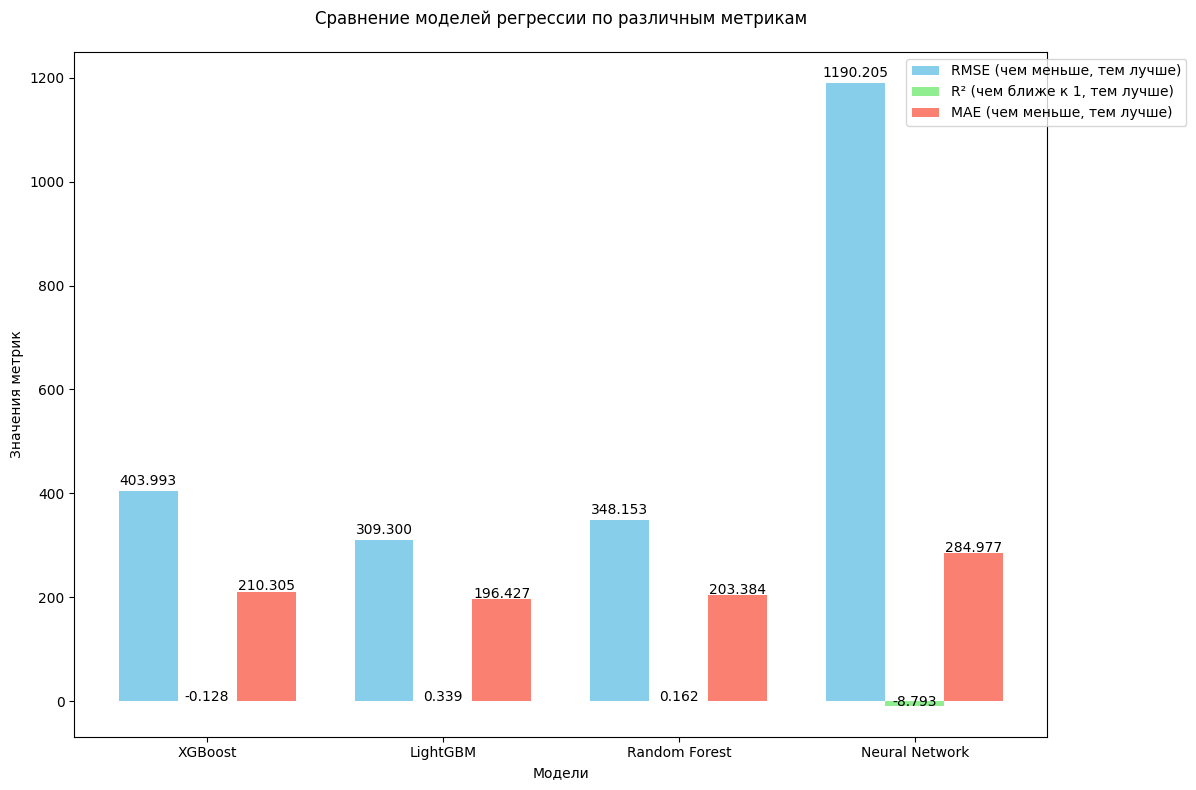

,RMSE,R2,MAE
Model,,,
XGBoost,403.992708,-0.128240,210.305354
LightGBM,309.299906,0.338677,196.427342
Random Forest,348.152540,0.162098,203.383825
Neural Network,1190.204994,-8.792595,284.976690


In [117]:
results = compare_regression_models(X, y_ic50)
results

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17926
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 169
[LightGBM] [Info] Start training from score 592.558563
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

/home/revel/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/revel/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


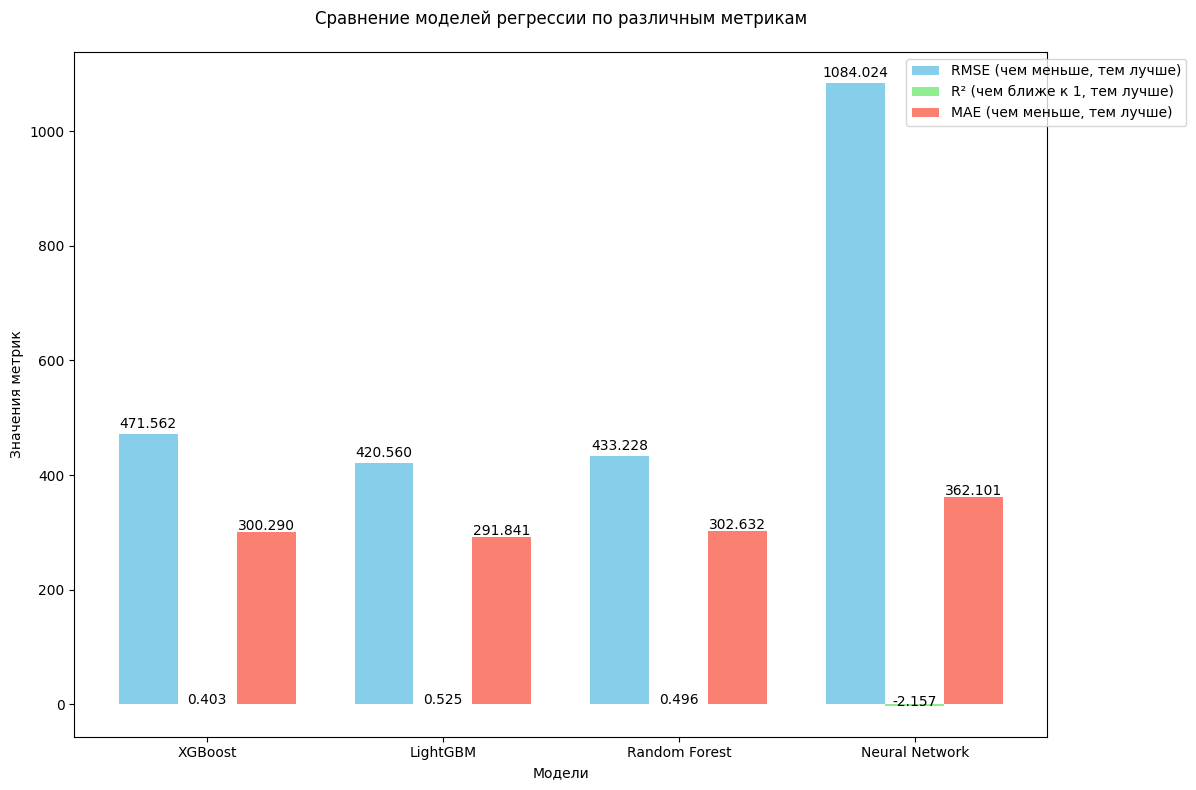

,RMSE,R2,MAE
Model,,,
XGBoost,471.561846,0.402606,300.289837
LightGBM,420.559940,0.524841,291.841072
Random Forest,433.228134,0.495784,302.632180
Neural Network,1084.023789,-2.156902,362.101081


In [118]:
results = compare_regression_models(X, y_cc50)
results

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001959 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17926
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 169
[LightGBM] [Info] Start training from score 79.185183
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/home/revel/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


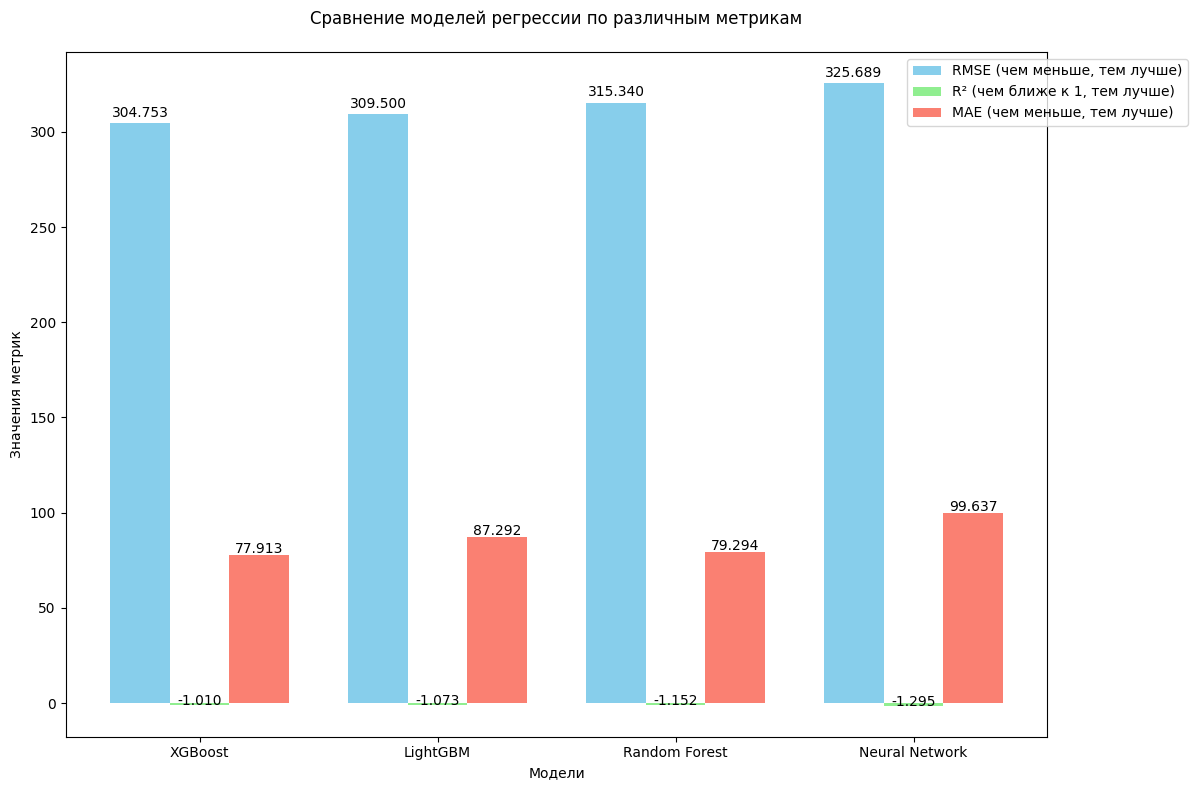

,RMSE,R2,MAE
Model,,,
XGBoost,304.752539,-1.009645,77.913402
LightGBM,309.499512,-1.072739,87.292401
Random Forest,315.339715,-1.151702,79.294414
Neural Network,325.689313,-1.295259,99.637330


In [119]:
results = compare_regression_models(X, y_si)
results

Лучшие выбрать LightGBM. Хотя Random Forest немного лучше по RMSE и R², LightGBM выигрывает по MAE (меньше ошибка), работает быстрее, экономит память и лучше масштабируется. Разница в RMSE/R² менее 1%, поэтому LightGBM предпочтительнее.  

Далее попробую настроить гиперпараметры LightGBM, чтобы улучшить RMSE и R², сохранив преимущество в MAE.

In [106]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Модели
models = {
    "XGBoost": XGBClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

# Обучение и оценка
for name, model in models.items():
    model.fit(X_train_scaled, y_si_class_8_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_si_class_8_test, y_pred)
    f1 = f1_score(y_si_class_8_test, y_pred)
    print(f"{name}: Accuracy={acc:.3f}, F1={f1:.3f}")

XGBoost: Accuracy=0.711, F1=0.532
[LightGBM] [Info] Number of positive: 286, number of negative: 514
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001975 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17995
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 168
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.357500 -> initscore=-0.586231
[LightGBM] [Info] Start training from score -0.586231
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

/home/revel/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Random Forest: Accuracy=0.692, F1=0.475
Logistic Regression: Accuracy=0.687, F1=0.496


In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators': [100, 200], 'max_depth': [3, 5]}
grid = GridSearchCV(LGBMRegressor(), params, cv=5)
grid.fit(X_train_scaled, y_ic50_train)
print(grid.best_params_)

{'max_depth': 3, 'n_estimators': 100}


In [108]:
from sklearn.ensemble import StackingRegressor
estimators = [('xgb', XGBRegressor()), ('lgbm', LGBMRegressor())]
stack = StackingRegressor(estimators, final_estimator=RandomForestRegressor())
stack.fit(X_train_scaled, y_ic50_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002161 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17995
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 168
[LightGBM] [Info] Start training from score 204.234616
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

/home/revel/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/revel/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/revel/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/revel/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001622 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15037
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 166
[LightGBM] [Info] Start training from score 203.598801
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

/home/revel/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


StackingRegressor(estimators=[('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                              ('lgbm', LGBMRegressor())],
                  final_estimator=RandomForestRegressor())

/home/revel/.venv/lib/python3.12/site-packages/shap/explainers/_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


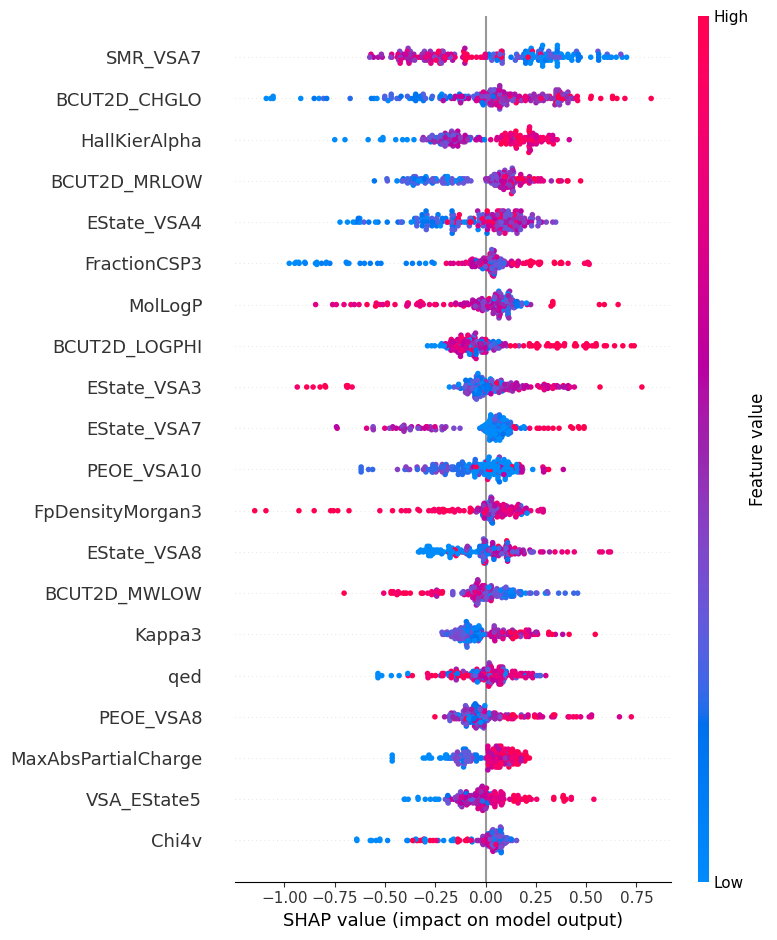

In [109]:
import shap
explainer = shap.TreeExplainer(models["LightGBM"])
shap_values = explainer.shap_values(X_test_scaled)
shap.summary_plot(shap_values, X_test)